In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve,auc, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support
from sklearn.metrics import f1_score,precision_recall_curve
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Install cassandra-driver to connect jupyter notebook with DataStax to gather data form it.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
credit_data= pd.read_csv("/content/drive/MyDrive/Internship_project/credit_data.csv")

In [ ]:
X= credit_data.drop('Class', axis= 1)
y= credit_data['Class']

In [ ]:
#Feature EngineeringPowerTransformer
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method='yeo-johnson', standardize=True)
df = power.fit_transform(X)

In [ ]:
df= pd.DataFrame(data= df, columns= X.columns)

In [ ]:
print(df.head())
print(df.shape)

   Unnamed: 0      Time        V1  ...       V27       V28    Amount
0   -2.196760 -2.415996 -0.956313  ...  0.339309 -0.070460  1.687680
1   -2.196402 -2.415996  0.591545  ... -0.072449  0.064067 -1.077119
2   -2.196094 -2.415754 -0.787014  ...  0.132473  0.239562  1.529365
3   -2.195816 -2.415540 -0.871306  ...  0.595623  0.815032  1.073355
4   -2.195558 -2.415540 -0.527650  ...  0.700036  0.313175 -0.920178

[5 rows x 31 columns]
(252903, 31)


Now we can see after using power transformation data became symmetric

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
smt = SMOTE(random_state=2425, n_jobs=-1,sampling_strategy='auto', k_neighbors=5)
X_sm, y_sm = smt.fit_resample(df, y)
print('Resampled dataset shape {}'.format(Counter(y_sm)))
print('Before Resampled dataset shape {}'.format(Counter(y)))

Resampled dataset shape Counter({0: 252502, 1: 252502})
Before Resampled dataset shape Counter({0: 252502, 1: 401})


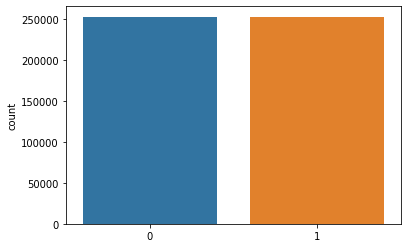

In [ ]:
sns.countplot(y_sm)

Oversampling Undersampling SMOTE - Out of all these three SMOTE is the most effective so we will go with it, In this technique, instead of simply duplicating data from the minority class, we synthesize new data from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling TEchnique, or SMOTE for short.

#Model building

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.30, random_state = 440)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(353502, 31)
(353502,)
(151502, 31)
(151502,)


Pipelines Creation

1. Data Preprocessing by using Standard Scaler
2. Reduce Dimension using PCA
3. Apply  Classifier

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [ ]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [ ]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [ ]:
pipeline_Knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('rf_classifier',KNeighborsClassifier())])

In [ ]:
pipeline_Gdb=Pipeline([('scalar5',StandardScaler()),
                     ('pca5',PCA(n_components=2)),
                     ('rf_classifier',GradientBoostingClassifier())])

In [ ]:
pipeline_Adb=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',AdaBoostClassifier())])

In [ ]:
## Lets make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_Knn, pipeline_Gdb,pipeline_Adb]


In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',
             3: "KNN", 4: 'GradientBoosting ' , 5: 'AdaBoost'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(x_train, y_train)

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Train Accuracy: {}".format(pipe_dict[i],model.score(x_train,y_train)))

Logistic Regression Train Accuracy: 0.9042749404529535
Decision Tree Train Accuracy: 0.9998217831865166
RandomForest Train Accuracy: 0.9999434232338148
KNN Train Accuracy: 0.949805093040492
GradientBoosting  Train Accuracy: 0.9112565134002071
AdaBoost Train Accuracy: 0.9098392654072679


In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(x_test,y_test)))

Logistic Regression Test Accuracy: 0.9046283217383269
Decision Tree Test Accuracy: 0.9187865506725984
RandomForest Test Accuracy: 0.9368721205000594
KNN Test Accuracy: 0.9264630169898748
GradientBoosting  Test Accuracy: 0.9116579319084896
AdaBoost Test Accuracy: 0.9099483835196895


In [ ]:
for i,model in enumerate(pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:RandomForest


#Classification Report

In [ ]:
from sklearn.metrics import classification_report, f1_score

models2= []
models3= []
for i, model in enumerate(pipelines):
    pred = model.predict(x_test)
    Class_Report=classification_report(y_test, pred)
    models2.append(Class_Report)
    print("Model Name :",model,"\n",Class_Report)
    f1sc=f1_score(y_test, pred, average='weighted')
    models3.append(f1sc)
    print("Testing Accuracy of Data with Model",model,":",round(f1sc,2),"\n")

Model Name : Pipeline(memory=None,
         steps=[('scalar1',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca1',
                 PCA(copy=True, iterated_power='auto', n_components=2,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('lr_classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=0,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False) 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91     75731
        

In [ ]:
x= X = ["Logistic Regression" , "Decision Tree","RandomForest" ,
    "KNN " , "GradientBoosting ","AdaBoost"]
d2 = {"Accuracy of Testing Data" : models3}
data_frame2 = pd.DataFrame(d2,index=X)
data_frame2

,Accuracy of Testing Data
Logistic Regression,0.903976
Decision Tree,0.918784
RandomForest,0.936845
KNN,0.926460
GradientBoosting,0.911085
AdaBoost,0.909288


#Confusion Matrix

In [ ]:
cmodel=[]
for i, model in enumerate(pipelines):
    pred = model.predict(x_test)
    cm = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    cmodel.append(cm)
    

dc={"Confusion Matrix":cmodel}    
conf_mat=pd.DataFrame(dc,index=X)

conf_mat

,Confusion Matrix
Logistic Regression,"[[62294, 13477], [972, 74759]]"
Decision Tree,"[[69994, 5777], [6527, 69204]]"
RandomForest,"[[69412, 6359], [3205, 72526]]"
KNN,"[[69709, 6062], [5079, 70652]]"
GradientBoosting,"[[62987, 12784], [600, 75131]]"
AdaBoost,"[[62477, 13294], [349, 75382]]"


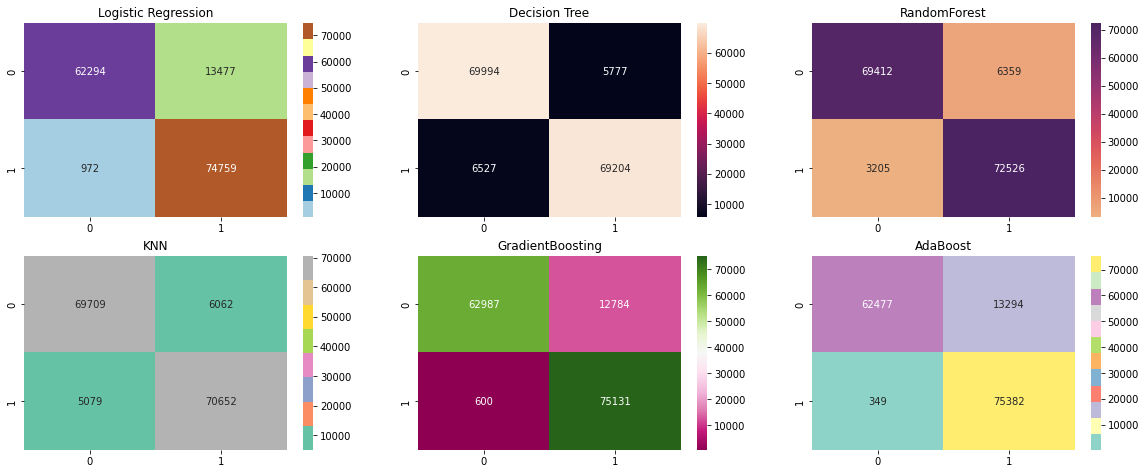

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(6,3,1)
sns.heatmap(cmodel[0],annot=True,fmt='d',cmap='Paired')
plt.title("Logistic Regression")
plt.subplot(6,3,2)
sns.heatmap(cmodel[1],annot=True,fmt='g',cmap='rocket')
plt.title("Decision Tree")
plt.subplot(6,3,3)
sns.heatmap(cmodel[2],annot=True,fmt='d',cmap='flare')
plt.title("RandomForest")  
plt.subplot(6,3,4)
sns.heatmap(cmodel[3],annot=True,fmt='g',cmap='Set2')
plt.title("KNN")
plt.subplot(6,3,5)
sns.heatmap(cmodel[4],annot=True,fmt='d',cmap='PiYG')
plt.title("GradientBoosting")
plt.subplot(6,3,6)
sns.heatmap(cmodel[5],annot=True,fmt='g',cmap='Set3')
plt.title("AdaBoost")
plt.show()

#Cross_validation

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
vmodel=[]
acvalmodel=[]

cv = RepeatedStratifiedKFold(n_splits=5, random_state=1)
for classifier, model in enumerate(pipelines):
    pred = model.predict(x_test)
    cross_val = cross_val_score(model, x_train, y_train, cv= cv, scoring='f1_weighted')
    acvalmodel.append(cross_val)
    print('Accuracy value :',cross_val)
    print('-----------------------------------')
    vmodel.append(round(cross_val.mean(),2))
    print('Final Average Accuracy :',round(cross_val.mean(),3))
    print("Final standard deviation :",cross_val.std())
    print('-----------------------------------')
    

Accuracy value : [0.90372073 0.9047813  0.90298152 0.90340376 0.90305161 0.90352683
 0.90238095 0.90518064 0.9037291  0.90314967 0.90523823 0.90302074
 0.90399676 0.90262516 0.90324437 0.9020646  0.90431659 0.90488341
 0.90287029 0.90377298 0.90211073 0.90331778 0.90529412 0.90344882
 0.90366724 0.90446464 0.90421668 0.90386617 0.90372727 0.90164639
 0.90299216 0.90397662 0.90488184 0.90226615 0.9038217  0.90480785
 0.90274157 0.90235093 0.90372727 0.90432372 0.90280198 0.90413797
 0.90330613 0.90580145 0.90216122 0.90295574 0.90307818 0.90474918
 0.90413292 0.90322048]
-----------------------------------
Final Average Accuracy : 0.904
Final standard deviation : 0.000943879299251765
-----------------------------------
Accuracy value : [0.91519104 0.91610878 0.91534309 0.91513272 0.91555724 0.91471014
 0.91418652 0.91568295 0.91530176 0.91434129 0.91667525 0.91458157
 0.91470753 0.91584099 0.91429917 0.91463843 0.91398753 0.9158393
 0.91579858 0.91395842 0.9131962  0.91475246 0.91670265

In [ ]:
dv={"RepeatedStratifiedKFold":acvalmodel,"Final Average Accuracy":vmodel}    
crossval=pd.DataFrame(dv,index=X)
crossval

,RepeatedStratifiedKFold,Final Average Accuracy
Logistic Regression,"[0.903720726274818, 0.9047813026375807, 0.9029...",0.90
Decision Tree,"[0.9151910399823798, 0.916108779615329, 0.9153...",0.92
RandomForest,"[0.9342225952750893, 0.9361673417842241, 0.934...",0.93
KNN,"[0.9247161238614432, 0.9267428469236516, 0.923...",0.92
GradientBoosting,"[0.9113656270825714, 0.9124958825051176, 0.910...",0.91
AdaBoost,"[0.9087962255295083, 0.9110082007149575, 0.908...",0.91


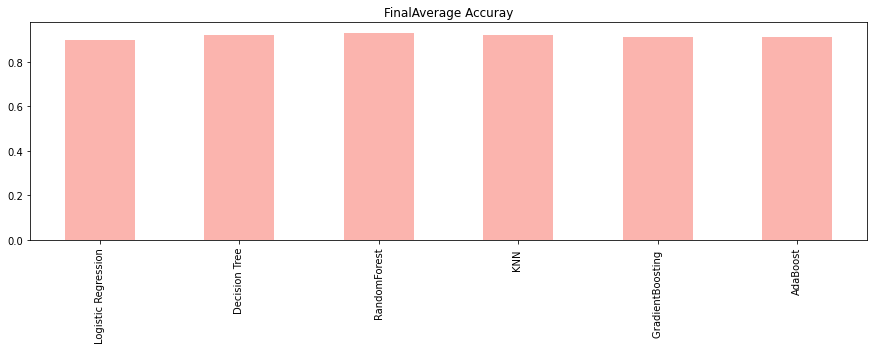

In [ ]:
#cross_val['Final Average Accuracy'].plot(kind='bar')
crossval['Final Average Accuracy'].plot(kind='bar',figsize=(15,4),title='FinalAverage Accuray',colormap='Pastel1')
plt.show()